Daily Transactions

Import Libraries and Load Data

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\Subhadip\Desktop\python\Daily Household Transactions.csv")

In [4]:
 #Displaythefirst fewrowsof thedataset
 data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [5]:
#coping the original Data
df=data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


DataCleaning
 ● Handlemissingvalues.
 ● Correctdatatypes.
 ● Removeduplicates

In [7]:
 #Checkformissingvalues
print("The count of null entries are:")
df.isnull().sum()


The count of null entries are:


Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [8]:
#Fillordropmissingvalues
df.dropna(subset=['Subcategory', 'Note'], inplace=True)

In [18]:
 #Convertdatatypes
 df['Date']=pd.to_datetime(df['Date'])
 df['Amount']=df['Amount'].astype(float)

In [24]:
#Checkeing Duplicate emtries
df_duplicate=df[df.duplicated()]
print("the count of duplicate",df_duplicate.shape[0])
print("The duplicate rows are:")
df_duplicate

the count of duplicate 0
The duplicate rows are:


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency


Step3:ExploratoryDataAnalysis(EDA)
 ● Summarystatistics.
 ● Distributionof transactionamounts.
 ● Transactioncountsbycategoryandtype

In [31]:
#checking Ouliers
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


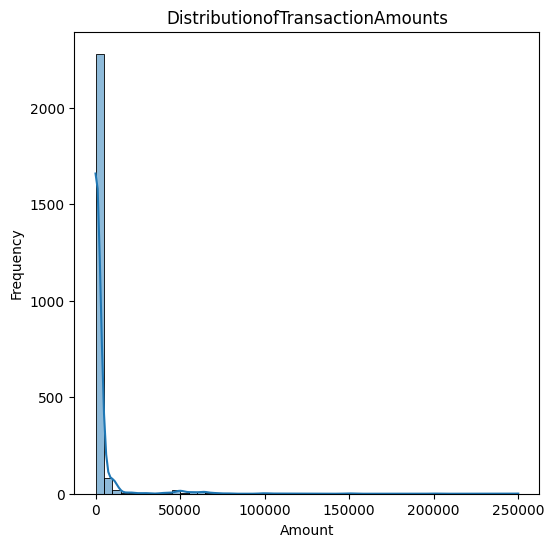

In [36]:
 #Distributionof transactionamounts
 plt.figure(figsize=(6,6))
 sns.histplot(df['Amount'],bins=50,kde=True)
 plt.title('DistributionofTransactionAmounts')
 plt.xlabel('Amount')
 plt.ylabel('Frequency')
 plt.show()

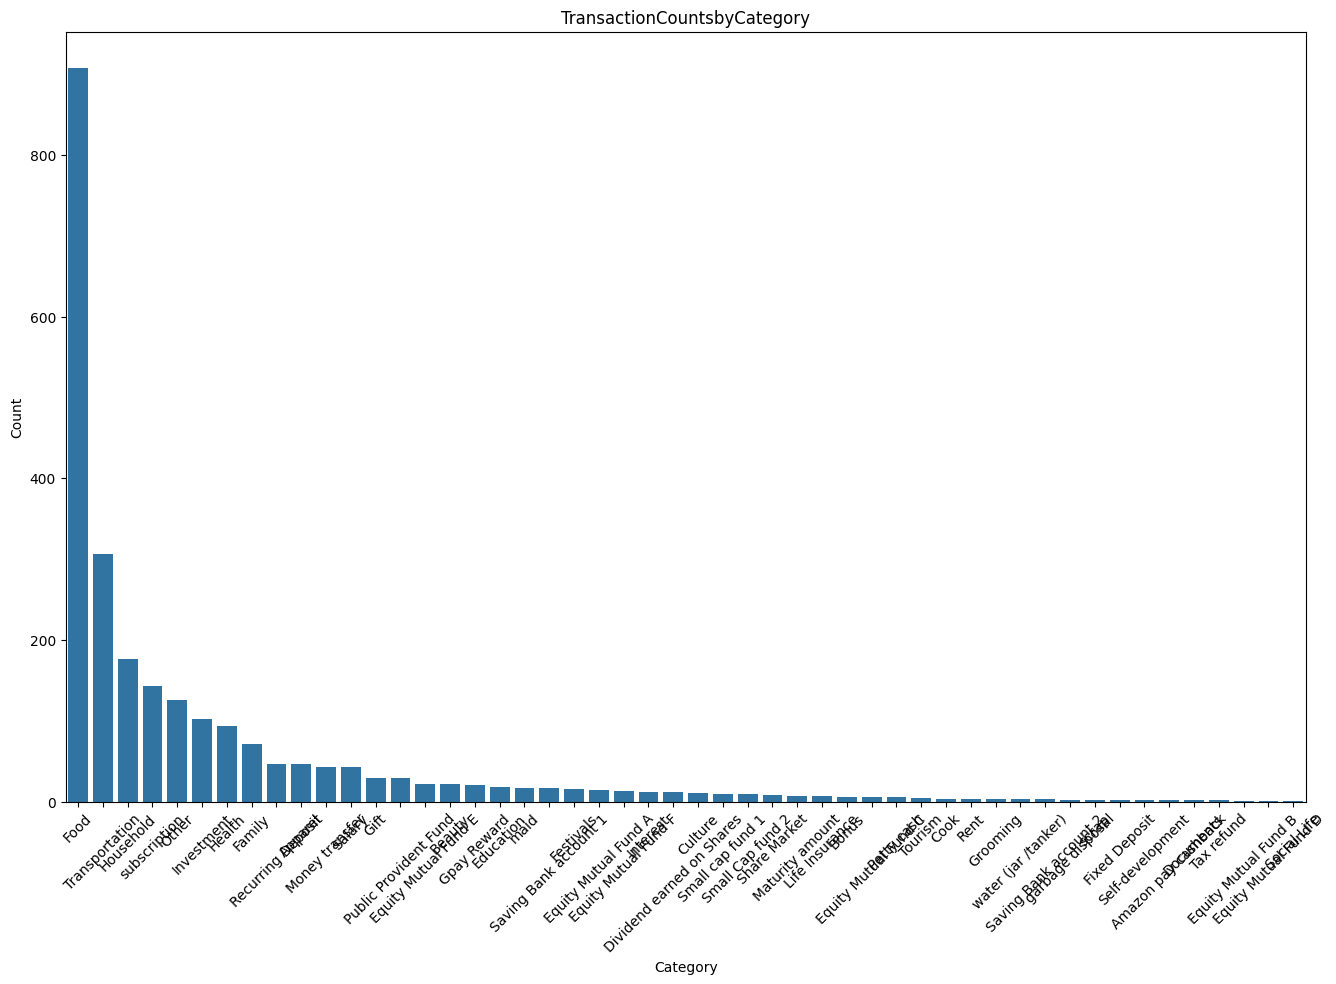

In [39]:
 #Transactioncountsbycategory
 plt.figure(figsize=(16,10))
 sns.countplot(data=df,x='Category',order=df['Category'].value_counts().index)
 plt.title('TransactionCountsbyCategory')
 plt.xlabel('Category')
 plt.ylabel('Count')
 plt.xticks(rotation=45)
 plt.show()

In [43]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


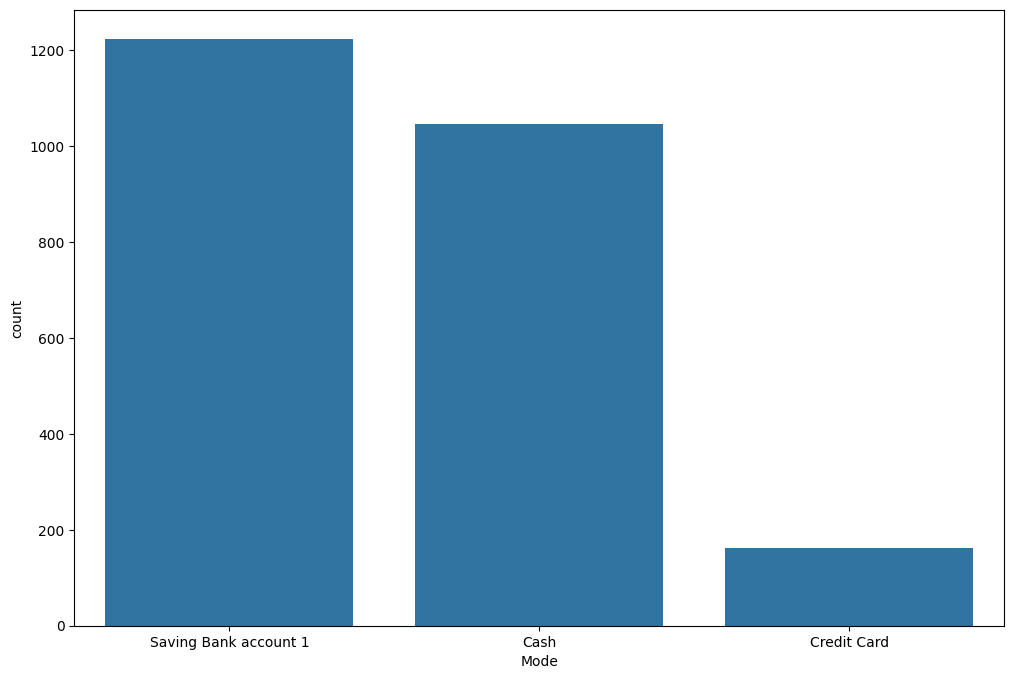

In [45]:
 # Transaction counts by type

 plt.figure(figsize = (12,8))
 sns.countplot(data = df, x = "Mode", order =
 df["Mode"].value_counts().iloc[:3].index)
 plt.show()

Time Series Analysis
 ● Trend analysis.
 ● Monthly and daily trends.

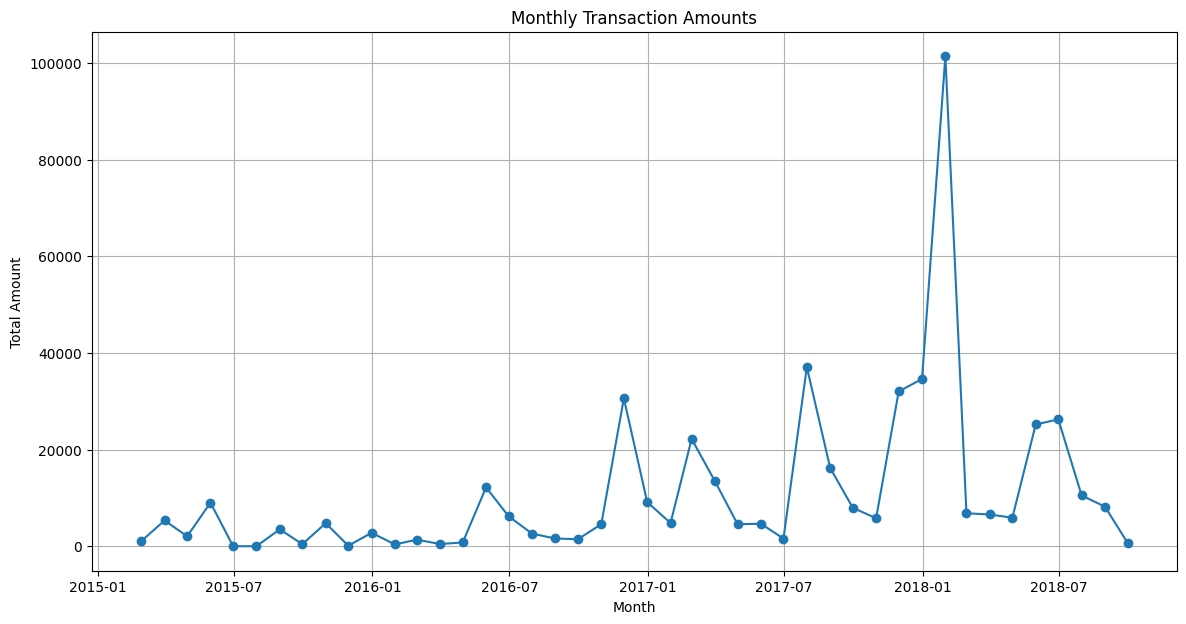

In [30]:
 # Resample data to monthly frequency
 monthly_data = df.resample('ME', on='Date').sum()
 plt.figure(figsize=(14, 7))
 plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
 plt.title('Monthly Transaction Amounts')
 plt.xlabel('Month')
 plt.ylabel('Total Amount')
 plt.grid(True)
 plt.show()

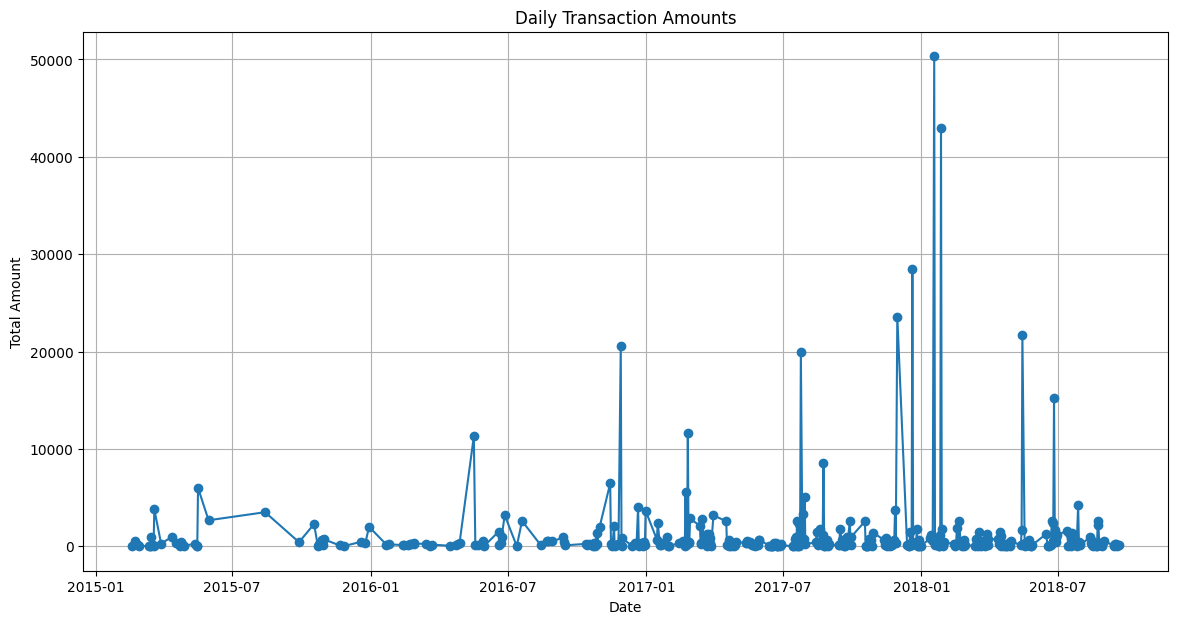

In [24]:
 # Daily trends
 daily_data = df.groupby(df['Date'].dt.date).sum(numeric_only=True)
 plt.figure(figsize=(14, 7))
 plt.plot(daily_data.index, daily_data['Amount'], marker='o')
 plt.title('Daily Transaction Amounts')
 plt.xlabel('Date')
 plt.ylabel('Total Amount')
 plt.grid(True)
 plt.show()

Correlation Analysis
 ● Analyze the correlation between transaction categories and amounts

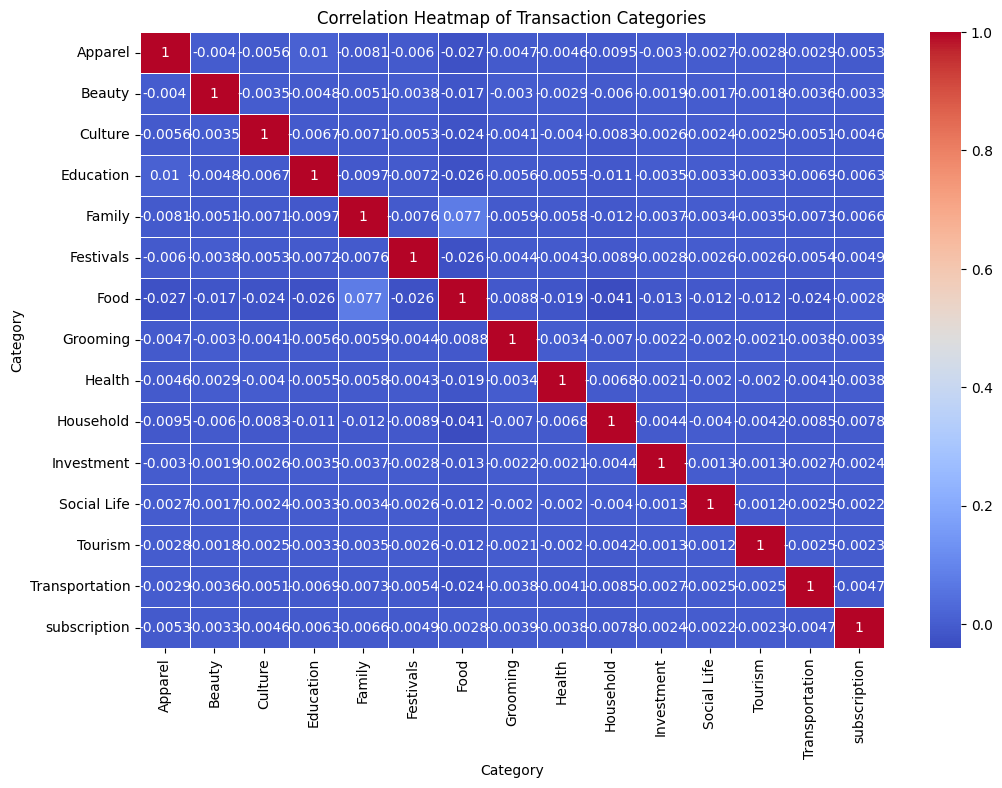

In [28]:
 # Create a pivot table for correlation analysis
 pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',aggfunc='sum', fill_value=0)
 # Calculate correlation matrix
 correlation_matrix = pivot_table.corr()
 # Plot correlation heatmap
 plt.figure(figsize=(12, 8))
 sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
 plt.title('Correlation Heatmap of Transaction Categories')
 plt.show()
